### Pruebas con LightGlue

In [1]:
# If we are on colab: this clones the repo and installs the dependencies
from pathlib import Path

if Path.cwd().name != "LightGlue":
    !git clone --quiet https://github.com/cvg/LightGlue/
    %cd LightGlue
    !pip install --progress-bar off --quiet -e .

from lightglue import LightGlue, SuperPoint, DISK
from lightglue.utils import load_image, rbd
from lightglue import viz2d
import torch

torch.set_grad_enabled(False)
images = Path("assets")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 'mps', 'cpu'

extractor = SuperPoint(max_num_keypoints=2048).eval().to(device)  # load the extractor
matcher = LightGlue(features="superpoint").eval().to(device)

image0 = load_image(images / "imagenes_productos/Biferdil_Tono_sobre_Tono.png")
image1 = load_image(images / "imagenes_gondolas/gondola biferdil.jpeg")

feats0 = extractor.extract(image0.to(device))
feats1 = extractor.extract(image1.to(device))
matches01 = matcher({"image0": feats0, "image1": feats1})
feats0, feats1, matches01 = [
    rbd(x) for x in [feats0, feats1, matches01]
]  # remove batch dimension

kpts0, kpts1, matches = feats0["keypoints"], feats1["keypoints"], matches01["matches"]
m_kpts0, m_kpts1 = kpts0[matches[..., 0]], kpts1[matches[..., 1]]

axes = viz2d.plot_images([image0, image1])
viz2d.plot_matches(m_kpts0, m_kpts1, color="lime", lw=0.2)
viz2d.add_text(0, f'Stop after {matches01["stop"]} layers', fs=20)

kpc0, kpc1 = viz2d.cm_prune(matches01["prune0"]), viz2d.cm_prune(matches01["prune1"])
viz2d.plot_images([image0, image1])
viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=10)

/Users/manu/Proyecto Final/Proyecto-Final-Gondolieri/LightGlue


/Users/manu/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


ModuleNotFoundError: No module named 'torch'

### Cálculo de la resolución

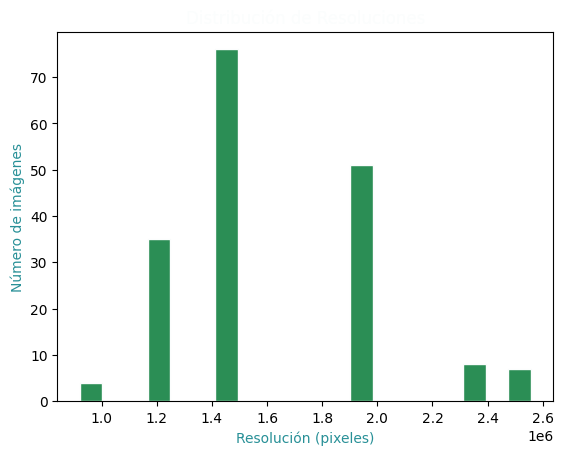

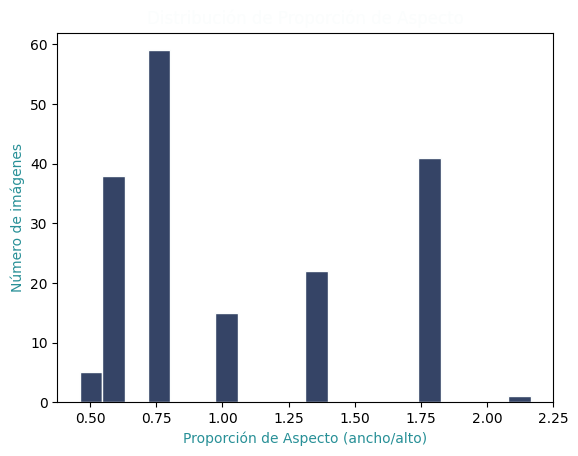

In [12]:
#%pip install matplotlib
import cv2
import os
import matplotlib.pyplot as plt

# Ruta donde están almacenadas las imágenes
image_folder = '/Users/manu/Downloads/Imagenes Productos'
image_folder = '/Users/manu/Downloads/Mayo-Junio-Julio (teoricamente)'

# Lista para almacenar las resoluciones de cada imagen
resolutions = []

# Iterar sobre las imágenes en la carpeta
for image_name in os.listdir(image_folder):
    if image_name.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp', '.jfif')):  # Filtra los archivos de imagen
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)
        
        # Obtener las dimensiones (alto y ancho)
        height, width = image.shape[:2]
        
        # Calcular la resolución (ancho * alto)
        resolution = width * height
        resolutions.append(resolution)

# Colores de la paleta extraída (RGB)
palette = [
    (0, 0, 0),        # Negro
    (43, 142, 85),    # Verde
    (251, 253, 253),  # Blanco
    (53, 68, 102),    # Azul oscuro
    (40, 144, 151)    # Cian
]

# Crear un histograma de resoluciones
plt.hist(resolutions, bins=20, color=[c/255 for c in palette[1]], edgecolor=[c/255 for c in palette[2]])
plt.title('Distribución de Resoluciones', color=[c/255 for c in palette[2]])
plt.xlabel('Resolución (pixeles)', color=[c/255 for c in palette[4]])
plt.ylabel('Número de imágenes', color=[c/255 for c in palette[4]])
plt.show()

# Lista para almacenar las proporciones de aspecto
aspect_ratios = []

# Iterar sobre las imágenes en la carpeta
for image_name in os.listdir(image_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):  # Filtra los archivos de imagen
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)
        
        # Obtener las dimensiones (alto y ancho)
        height, width = image.shape[:2]
        
        # Calcular la proporción de aspecto (ancho / alto)
        aspect_ratio = width / height
        aspect_ratios.append(aspect_ratio)

# Crear un histograma de proporción de aspecto
plt.hist(aspect_ratios, bins=20, color=[c/255 for c in palette[3]], edgecolor=[c/255 for c in palette[2]])
plt.title('Distribución de Proporción de Aspecto', color=[c/255 for c in palette[2]])
plt.xlabel('Proporción de Aspecto (ancho/alto)', color=[c/255 for c in palette[4]])
plt.ylabel('Número de imágenes', color=[c/255 for c in palette[4]])
plt.show()


In [11]:
import os

# Definir las rutas de las carpetas
image_folder1 = '/Users/manu/Downloads/Imagenes Productos'
image_folder2 = '/Users/manu/Downloads/Mayo-Junio-Julio (teoricamente)'

# Función para contar imágenes en una carpeta
def count_images(folder):
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp', '.jfif')
    return len([file for file in os.listdir(folder) if file.lower().endswith(image_extensions)])

# Contar imágenes en cada carpeta
count1 = count_images(image_folder1)
count2 = count_images(image_folder2)

# Imprimir los resultados
print(f'Número de imágenes en "{image_folder1}": {count1}')
print(f'Número de imágenes en "{image_folder2}": {count2}')

Número de imágenes en "/Users/manu/Downloads/Imagenes Productos": 343
Número de imágenes en "/Users/manu/Downloads/Mayo-Junio-Julio (teoricamente)": 181


In [ ]:
import os

# Definir las rutas de las carpetas
image_folder1 = '/Users/manu/Downloads/Imagenes Productos'
image_folder2 = '/Users/manu/Downloads/Mayo-Junio-Julio (teoricamente)'

# Función para contar imágenes en una carpeta
def count_images(folder):
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp', '.jfif')
    return len([file for file in os.listdir(folder) if file.lower().endswith(image_extensions)])

# Contar imágenes en cada carpeta
count1 = count_images(image_folder1)
count2 = count_images(image_folder2)

# Imprimir los resultados
print(f'Número de imágenes en "{image_folder1}": {count1}')
print(f'Número de imágenes en "{image_folder2}": {count2}')

### Análisis de Color

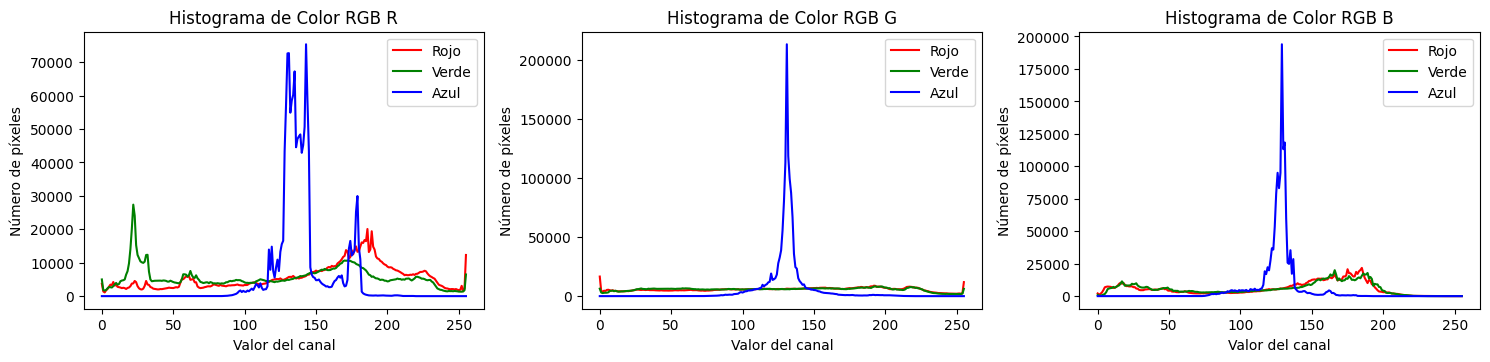

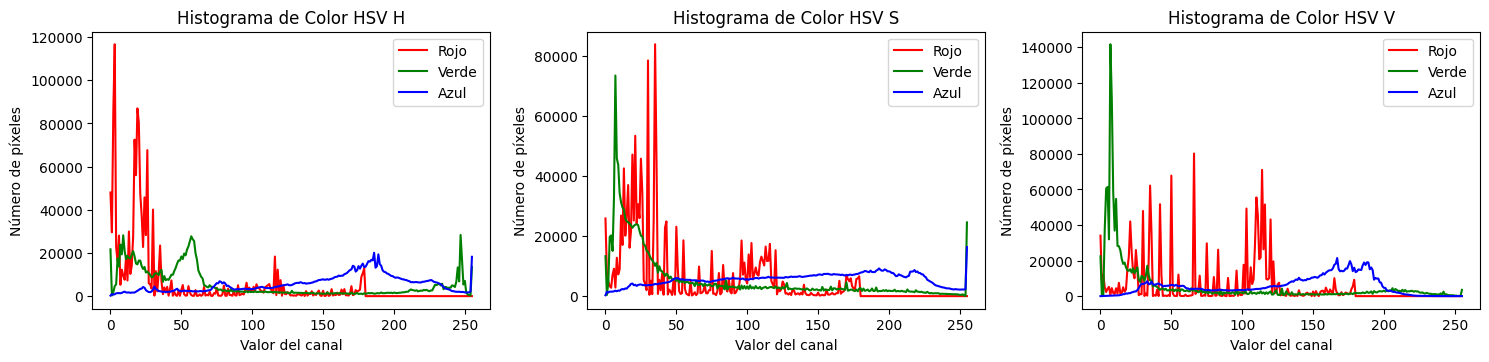

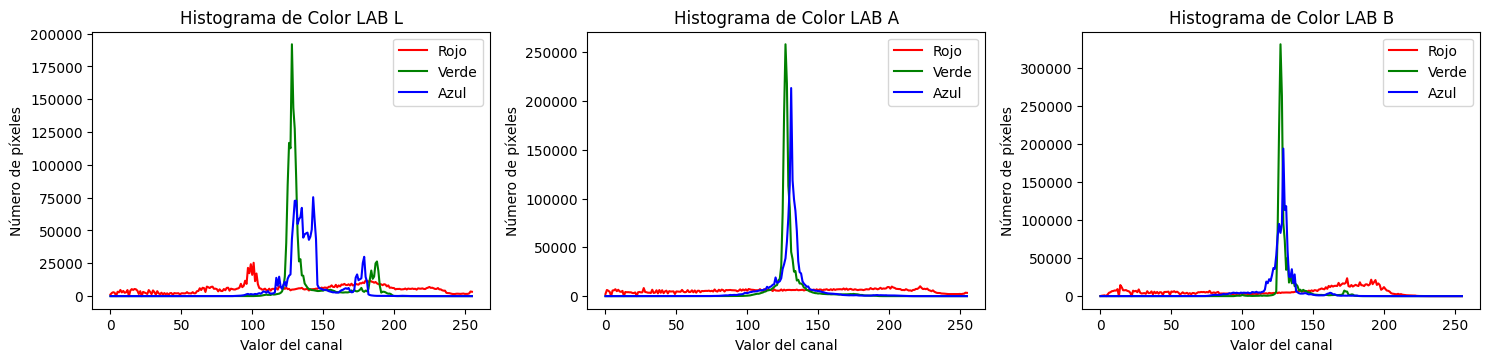

In [9]:

import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Ruta donde están almacenadas las imágenes
image_folder = '/Users/manu/Downloads/Mayo-Junio-Julio (teoricamente)'

# Listas para almacenar los histogramas
histograms_rgb = []
histograms_hsv = []
histograms_lab = []

# Función para calcular histogramas de color
def calcular_histogramas(imagen):
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
    imagen_lab = cv2.cvtColor(imagen, cv2.COLOR_BGR2LAB)

    hist_r = cv2.calcHist([imagen_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([imagen_rgb], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([imagen_rgb], [2], None, [256], [0, 256])

    hist_h = cv2.calcHist([imagen_hsv], [0], None, [256], [0, 256])
    hist_s = cv2.calcHist([imagen_hsv], [1], None, [256], [0, 256])
    hist_v = cv2.calcHist([imagen_hsv], [2], None, [256], [0, 256])

    hist_l = cv2.calcHist([imagen_lab], [0], None, [256], [0, 256])
    hist_a = cv2.calcHist([imagen_lab], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([imagen_lab], [2], None, [256], [0, 256])

    return (hist_r, hist_g, hist_b), (hist_h, hist_s, hist_v), (hist_l, hist_a, hist_b)

# Iterar sobre las imágenes en la carpeta
for image_name in os.listdir(image_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):  # Filtra los archivos de imagen
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)
        
        if image is not None:
            hist_rgb, hist_hsv, hist_lab = calcular_histogramas(image)
            histograms_rgb.append(hist_rgb)
            histograms_hsv.append(hist_hsv)
            histograms_lab.append(hist_lab)

# Función para graficar histogramas
def plot_histogramas(histogramas, titulo, colores):
    plt.figure(figsize=(15, 10))
    for i, (hist, color) in enumerate(zip(histogramas, colores)):
        plt.subplot(3, 3, i+1)
        plt.plot(hist[0], color='red', label='Rojo')
        plt.plot(hist[1], color='green', label='Verde')
        plt.plot(hist[2], color='blue', label='Azul')
        plt.title(f'{titulo} {color}')
        plt.xlabel('Valor del canal')
        plt.ylabel('Número de píxeles')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Colores de la paleta para las gráficas
colores_paleta = ['RGB', 'HSV', 'LAB']

# Graficar histogramas de color en espacios RGB, HSV y LAB
plot_histogramas(histograms_rgb, 'Histograma de Color RGB', colores_paleta[0])
plot_histogramas(histograms_hsv, 'Histograma de Color HSV', colores_paleta[1])
plot_histogramas(histograms_lab, 'Histograma de Color LAB', colores_paleta[2])
